In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading data

In [10]:
df_orders = pd.read_parquet("../data/processed/orders.parquet")
df_orders.head()

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
0,11271445836,ae86517015883ca081749cbc3352bab1e5b3ab8739e977...,VANESSA,RECIFE,BR,MADALENA,7974481,-34.91,-8.05,PE,...,634171fcc2289c475e8686701633c2eccccdccf6d4684c...,-34.91,-8.05,America/Recife,2019-01-31 23:59:59+00:00,fbff2657f7f1acd96f07ab9405cd89f6c3072f4b9c4407...,False,84.9,IOS,NaT
1,01075288543,d180e24c47fd1855ce52826f4afba60f882c486950db45...,CAROLINA,SAO PAULO,BR,PINHEIROS,5076233,-46.69,-23.57,SP,...,5a9af8d38b5fb82d72a780fa5d5c57b78cf0d575a0cf68...,-46.69,-23.57,America/Sao_Paulo,2019-01-31 23:59:59+00:00,5f1e9c51d56ec52560697323dc47ea3bd91016774e7cdd...,False,31.0,ANDROID,NaT
2,76699651238,1fb11ef03163611bdee2efdf21b475c1edceb9a786eda3...,MARIANNA,RIO DE JANEIRO,BR,BENFICA,7978829,-43.24,-22.89,RJ,...,cf9a2ce74bea159ccd31b684c85a4e1985b55e932e475c...,-43.24,-22.89,America/Sao_Paulo,2019-01-31 23:59:59+00:00,262579f2b5906addc7e870c33ac6b69b34ac817cdb0722...,False,44.0,DESKTOP,NaT
3,20153869125,442015dd768b756b5a444777b434d803e5996c4a202342...,ELEN,CAMPINAS,BR,JARDIM AURELIA,6823015,-47.10,-22.91,SP,...,bd0ae53e11857bf74c691d95574985a64371bff0b80ec6...,-47.10,-22.91,America/Sao_Paulo,2019-01-31 23:59:59+00:00,120563e97a54d88d2594ffc32a0900f33cc23e3d9cd394...,False,39.0,IOS,NaT
4,64714515154,5aa9c0c9b318ddfb35917248ef65efa0a2d02e007b5ba8...,KASSIANA,CURITIBA,BR,BOA VISTA,8932430,-49.25,-25.38,PR,...,76b9b57832e24ec1707d312f87eb2b4fc6dcd92b0c8a5c...,-49.25,-25.38,America/Sao_Paulo,2019-01-31 23:59:58+00:00,c984641f2bb9e4fd4114a2476d373ef416241219bf8c78...,False,25.1,ANDROID,NaT


In [5]:
df_ab_test = pd.read_parquet("../data/processed/ab_test.parquet")
df_ab_test.head()

,customer_id,is_target
0,755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...,target
1,b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...,control
2,d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...,control
3,6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...,target
4,dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...,control


In [6]:
df_consumers = pd.read_parquet("../data/processed/consumers_processed.parquet")
df_consumers.head()

,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number
0,c38548778a271699067c05fe75fed7b1cb7c74c999a296...,pt-br,2018-04-06 05:11:12.946000+00:00,True,ANALUCE,20,221164583
1,a0c32c941a099175dec3c0c9aae036e1d8d8901cb049f6...,pt-br,2018-04-06 05:11:12.946000+00:00,True,FABIANA,31,74385390
2,889c905b374a0c4f088444292baac6b9b0428bb3a1821b...,pt-br,2018-04-06 05:11:12.946000+00:00,True,TULASI,51,942786817
3,44895a9fcbd2d523bc1f0a06dbe5a894f39dbe0bc4e671...,pt-br,2018-04-06 05:11:12.946000+00:00,True,DANUSIA,8,866073397
4,004a0cb5ca311e07daca7da4bcd785ef528028b031d2d0...,pt-br,2018-04-06 05:11:12.946000+00:00,True,TÂNIA,6,791103647


In [8]:
df_restaurants = pd.read_parquet("../data/processed/restaurants_processed.parquet")
df_restaurants.head()

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
0,931da3efd65ffa8ecc6a479ff4f16ee49359e31e89958f...,2017-01-23 12:54:52.155000+00:00,False,1,30.0,0,30.0,25.0,35560,SAO PAULO,SP,BR
1,3c3126fab54a9d1a15af43fcda1fde2c49eb18d9ac0423...,2017-01-23 12:54:49.183000+00:00,False,1,30.0,0,60.0,0.0,51020,RECIFE,PE,BR
2,cc5514812859f90b6d116417ba3732edc89482b176bcfa...,2017-01-23 12:54:39.558000+00:00,False,1,30.0,0,50.0,10.0,39620,SAO PAULO,SP,BR
3,fc061ae616f83a94c53ebb548188cd7c09fc6482182a98...,2017-01-23 12:54:32.760000+00:00,False,1,30.0,0,30.0,13.0,22741,SAO PAULO,SP,BR
4,bf9d6811d3bd93f5fb1a9166658660b13c122595ab38a8...,2017-01-23 12:54:23.246000+00:00,False,4,80.0,0,45.0,20.0,88015,FLORIANOPOLIS,SC,BR



# 

# 1) Evaluation os A/B tests' KPIs


> Defina os indicadores relevantes para mensurar o sucesso da campanha e analise se ela teve impacto significativo dentro do  período avaliado. 

In [11]:
df_users_orders = df_orders.merge(df_ab_test, on='customer_id', how='inner')
df_users_orders.head()

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date,is_target
0,11271445836,ae86517015883ca081749cbc3352bab1e5b3ab8739e977...,VANESSA,RECIFE,BR,MADALENA,7974481,-34.91,-8.05,PE,...,-34.91,-8.05,America/Recife,2019-01-31 23:59:59+00:00,fbff2657f7f1acd96f07ab9405cd89f6c3072f4b9c4407...,False,84.9,IOS,NaT,target
1,01075288543,d180e24c47fd1855ce52826f4afba60f882c486950db45...,CAROLINA,SAO PAULO,BR,PINHEIROS,5076233,-46.69,-23.57,SP,...,-46.69,-23.57,America/Sao_Paulo,2019-01-31 23:59:59+00:00,5f1e9c51d56ec52560697323dc47ea3bd91016774e7cdd...,False,31.0,ANDROID,NaT,target
2,76699651238,1fb11ef03163611bdee2efdf21b475c1edceb9a786eda3...,MARIANNA,RIO DE JANEIRO,BR,BENFICA,7978829,-43.24,-22.89,RJ,...,-43.24,-22.89,America/Sao_Paulo,2019-01-31 23:59:59+00:00,262579f2b5906addc7e870c33ac6b69b34ac817cdb0722...,False,44.0,DESKTOP,NaT,target
3,20153869125,442015dd768b756b5a444777b434d803e5996c4a202342...,ELEN,CAMPINAS,BR,JARDIM AURELIA,6823015,-47.10,-22.91,SP,...,-47.10,-22.91,America/Sao_Paulo,2019-01-31 23:59:59+00:00,120563e97a54d88d2594ffc32a0900f33cc23e3d9cd394...,False,39.0,IOS,NaT,target
4,64714515154,5aa9c0c9b318ddfb35917248ef65efa0a2d02e007b5ba8...,KASSIANA,CURITIBA,BR,BOA VISTA,8932430,-49.25,-25.38,PR,...,-49.25,-25.38,America/Sao_Paulo,2019-01-31 23:59:58+00:00,c984641f2bb9e4fd4114a2476d373ef416241219bf8c78...,False,25.1,ANDROID,NaT,target


### Calculating KPI's per group

**Main KPIs evaluated:**

- Retention and activation rates
- Avg order per user / Order frequency per user
- Average spend per order (ASP)
- Total Revenue
- Average spend per consumer

In [67]:
# Calculating KPIs per group

results = {}
for group in ['target', 'control']:
    qt_group_users = df_ab_test[df_ab_test["is_target"] == group]['customer_id'].nunique()
    df_group_orders  = df_users_orders[['order_id', 'order_created_at', 'order_total_amount', 'customer_id', 'is_target']] \
                                    .query(f'is_target == "{group}"')   
    
    #==============================
    # Users and retetion metrics
    #==============================
    # Total of users and orderrs in each groop 
    total_users = qt_group_users
    total_orders = df_group_orders["order_id"].nunique()
    
    # Active Customers - Customers that had at least 1 order
    active_users = df_group_orders[["order_id", "customer_id"]].groupby('customer_id').count().reset_index() # total orders per customer
    active_users_count = len(active_users)
    activation_rate =  round(active_users_count / total_users ,4)
    
    # Retention rate(users that done at least 2 orders) 
    #   Here I'm assuming that the cupom was for only 1 order. So, if the customer returned after use the coupon, we can count as a retention after user
    #   Another approach would be if they received a coupon for a period (ex.: week), we could see the weekly retention, but I do not have the campaign 
    #    configuration and rules info
    retained_users = active_users[active_users['order_id'] > 1]['customer_id'].nunique()
    retention_rate = round(retained_users / total_users, 4)


    #==============================
    # Averages per user, group
    #==============================        
    # Order frequency per users - Total orders / total_users
    avg_orders_per_user = round(total_orders / total_users, 4)
    
    # Average ticket of orders 
    avg_order_value = round(df_group_orders['order_total_amount'].mean(),4)
    

    #==============================
    # Revenues KPIs
    #==============================
    # Receita total e por usuário
    total_revenue = df_group_orders['order_total_amount'].sum()
    revenue_per_user = round(total_revenue / total_users, 4)
    

    #==============================
    # Saving values of the group
    #==============================
    results[group] = {
        'total_users': total_users,
        'active_users': active_users_count,
        'activation_rate': activation_rate,
        'retention_rate': retention_rate,
        'avg_orders_per_user': avg_orders_per_user,
        'avg_order_value': avg_order_value,
        'revenue_per_user': revenue_per_user,
        'total_revenue': total_revenue
    }


df_results = pd.DataFrame.from_dict(results,orient='index').reset_index()
df_results

,index,total_users,active_users,activation_rate,retention_rate,avg_orders_per_user,avg_order_value,revenue_per_user,total_revenue
0,target,445924,445924,1.0,0.5762,3.1769,47.8091,151.8868,67729986.45
1,control,360542,360542,1.0,0.4763,2.8034,47.9177,134.3317,48432203.49


### Quick insights

- Activation rate is not a reliable metric, as all users (on 'ab_test' file) had at least 1 order_id
  - This would be one one of the ways to evaluate. Does the coupon helped increase our active base? 
- There's a clear increase in retetion and avg orders per user. And consequently the increase on revenue per user and total revenue
  - Even though, the mean ticket is the pratically the same

<br></br>
### Doing statistical tests to evaluate the results

**Evaluation method**: 
- The main method of evaluation used here is the T - test (Student's T)
- T-test is a statistic model that compare the means of different groups
  - If the difference found between the groups is smaller enough (comparing to alpha) we can assume that we may have a statiscally significant  
- For this case I'm assuming a **0.05 of significance level** (as is the market standard)
- Retention is not possible to use with this method as is a binary variable not a mean 

**Hyphotesis**:
- H0: There's no significative difference between the groups 
- Ha: There's significative difference on the target group compared to control

In [55]:
# Preparing data for statistical tests
df_target_users = df_users_orders[df_users_orders['is_target'] == 'target'].groupby('customer_id')
df_control_users = df_users_orders[df_users_orders['is_target'] == 'control'].groupby('customer_id')

# KPIs per user
target_metrics = df_target_users.agg({
    'order_id': 'count',
    'order_total_amount': 'mean'
}).rename(columns={'order_id': 'num_orders', 'order_total_amount': 'avg_value'})

control_metrics = df_control_users.agg({
    'order_id': 'count',
    'order_total_amount': 'mean'
}).rename(columns={'order_id': 'num_orders', 'order_total_amount': 'avg_value'})

print(target_metrics.head())
print(control_metrics.head())

                                                    num_orders   avg_value
customer_id                                                               
000021924bf8192f64a7cc17ce7c0bc511cba907308f80f...           3   57.966667
000022ced2f3aa411b66ac41167b272ae528c4acdffeebb...           2   34.325000
00006f567cb362ba98b0a23d9f9f73122e9ad98c9edb45b...           5  106.620000
0000f399c324f0463577b43bae1fd817f31e6fe768405ac...           1   38.000000
0001004b6873a53fef60d11f4d2e4435ea27bed7e5fc382...           1   30.900000
                                                    num_orders  avg_value
customer_id                                                              
000009e29b12d8c5b9c9579e21384320c2df3bd935f19e1...           8  34.125000
000032b594523c3f8868edee4f1577b157e115cd01ab311...           1  88.800000
0000bb10fb47a1d6b2d73754ef383950ef536c77d07212e...           2  94.095000
0000c21984ae00cefb5d4931bfa49483dde546413c9b40c...          23  43.972174
00010814ab1e602ccbc9ffe3b64f449

In [60]:
# Applying t-test for frequency of orders
t_stat, p_value = stats.ttest_ind(
    target_metrics['num_orders'].dropna(),
    control_metrics['num_orders'].dropna(),
    equal_var=False
)

print(f"T test for order/purchase frequency: t={t_stat:.4f}, p={p_value:.4f}") 
#   Show significance as p value < significance level; a so low p-value means that the diff obsered is highly significative
#   Also, the t value high as 44 shows us that there's a high variability within the groups, 
#    indicating a signficance in the difference between them

T test for order/purchase frequency: t=44.9030, p=0.0000


In [62]:
# T test for average order value (ASP) 
t_stat, p_value = stats.ttest_ind(
    target_metrics['avg_value'].dropna(),
    control_metrics['avg_value'].dropna(),
    equal_var=False
)
print(f"Test T for the average order value: t={t_stat:.4f}, p={p_value:.4f}")

# A high p-value, showing that there's no indication of signficance on the diff between the groups

Test T for the average order value: t=-0.7641, p=0.4448


In [71]:
print(df_results[df_results["index"] == 'target']['revenue_per_user'])
print(df_results[df_results["index"] == 'control']['revenue_per_user'])

0    151.8868
Name: revenue_per_user, dtype: float64
1    134.3317
Name: revenue_per_user, dtype: float64


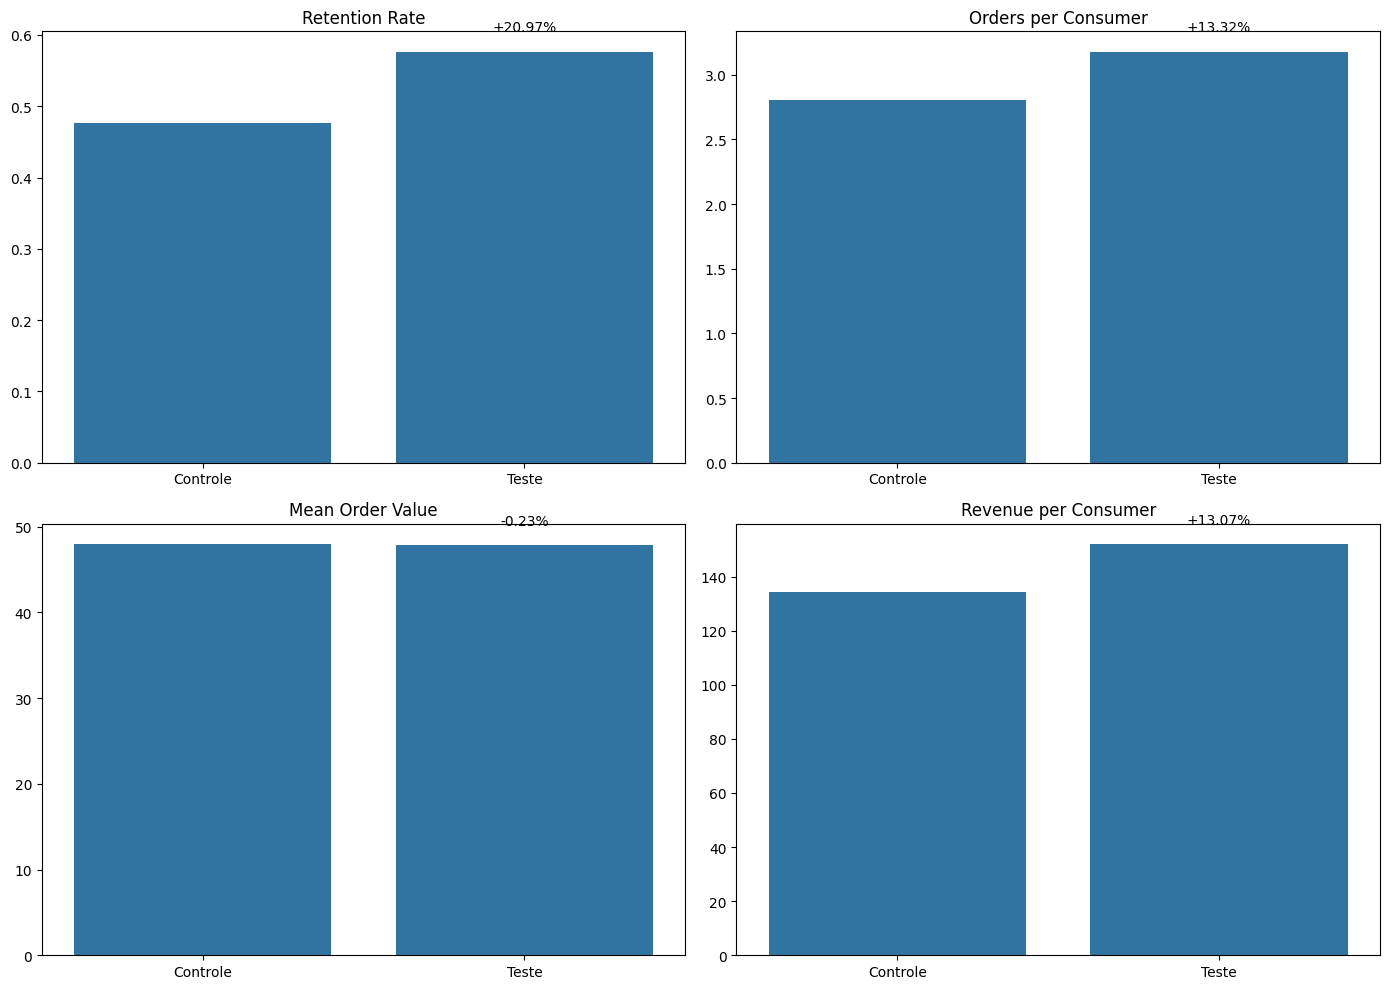

In [76]:
# Creating a plot to compare the differences between the groups 

# Creating dataframe for comparinson
df_comparison_groups = pd.DataFrame({
    'Metric': ['Retention Rate', 'Orders per Consumer', 'Mean Order Value', 'Revenue per Consumer'],
    'Control Group': [
        results['control']['retention_rate'],
        results['control']['avg_orders_per_user'],
        results['control']['avg_order_value'],
        results['control']['revenue_per_user']
    ],
    'Test Group': [
        results['target']['retention_rate'],
        results['target']['avg_orders_per_user'],
        results['target']['avg_order_value'],
        results['target']['revenue_per_user']
    ]
})

# Calculation the % difference between the groups
df_comparison_groups['% Difference'] = ((df_comparison_groups['Test Group'] - df_comparison_groups['Control Group']) / 
                                         df_comparison_groups['Control Group'] * 100).round(2)

#==============================
# Creating plot 
#==============================
# Bar plot to visulize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

metrics = ['Retention Rate', 'Orders per Consumer', 'Mean Order Value', 'Revenue per Consumer']
for i, metric in enumerate(metrics):
    sns.barplot(
        x=['Controle', 'Teste'],
        y=[df_comparison_groups.loc[i, 'Control Group'], df_comparison_groups.loc[i, 'Test Group']],
        ax=axes[i]
    )
    axes[i].set_title(metric)
    axes[i].text(
        1, 
        df_comparison_groups.loc[i, 'Test Group'] * 1.05, 
        f"{df_comparison_groups.loc[i, '% Difference']:+.2f}%", 
        ha='center'
    )

plt.tight_layout()
plt.savefig('imgs/abtest_comparing_groups.png')
plt.show()

<br></br>

# FINANCIAL VIABILITY

> Faça uma análise de viabilidade financeira dessa iniciativa como alavanca de crescimento, adotando as premissas que julgar necessárias (explicite as premissas adotadas)

---

## Financial evaluation:
